# Assignment 4 - Regularlization and Model Tuning

#### Find a data set that is suitable as a topic of a regression analysis; you may use the data set that was discussed in class on January 30th, 2019 or the dataset data you have used for assignment 3 if they have at least 10 features. For such dataset perfom the following analysis, 

####  Plot the learning curve for:
####  1-	Regular linear regression 
####  2-	Polynomial regression with degree=5 
####  3-	Ridge regression for polynomial features created (from the original features)
####  4-	Lasso regression for polynomial features created (from the original features)
####  5-	Elastic Net for polynomial features created (from the original features)

#### Explain if you see any sign of overfitting/underfitting in each curve.

#### Find the optimal alpha and R^2 using: 
#### 1.	RidgeCV
#### 2.	LassoCV
#### 3.	ElasticNetCV


I will be using the housing price data from the Jan 30th class. MEDV is the target (y). 

### Import our required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the housing price data

In [7]:
hp=pd.read_table('data/housingdata.csv',sep=',')
hp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
hp.shape

(506, 14)

In [9]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM      506 non-null float64
ZN        506 non-null float64
INDUS     506 non-null float64
CHAS      506 non-null int64
NOX       506 non-null float64
RM        506 non-null float64
AGE       506 non-null float64
DIS       506 non-null float64
RAD       506 non-null int64
TAX       506 non-null int64
PTRAIO    506 non-null float64
B         506 non-null float64
LSTAT     506 non-null float64
MEDV      506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [10]:
hp.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRAIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
hp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Run the function to plot learning curves

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=19930421)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Test")
    plt.ylim(top=20)
    plt.ylim(bottom=0)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()

### 1 - Learning curve for regular linear regression 

First, define X as all covariates (all attributes except the target, MEDV) and y as MEDV. 

In [14]:
X=hp[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRAIO', 'B', 'LSTAT']].values
y=hp['MEDV'].values

# Need to reshape X because sklearn model fitting techniques don't like 1D arrays as inputs 
y=y.reshape(len(y),1)
     
X.shape

(506, 13)

In [15]:
y.shape

(506, 1)

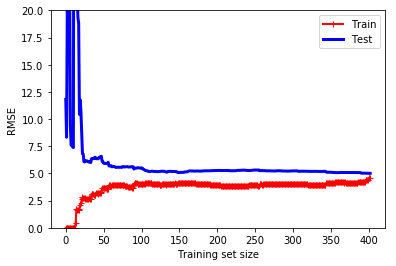

In [16]:
from sklearn.linear_model import LinearRegression

plot_learning_curves(LinearRegression(), X, y)

## **Observations:**
1. At steady state, low training and testing RMSE 
1. RMSE is somewhat higher than the train RMSE (could be sign of a little bit of overfitting). 

### 2-	Learning curve for polynomial regression with degree=5 

First we create polynomial features with degree 5 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=5, include_bias=False)

X_poly=poly_features.fit_transform(X) 

X_poly.shape

(506, 8567)

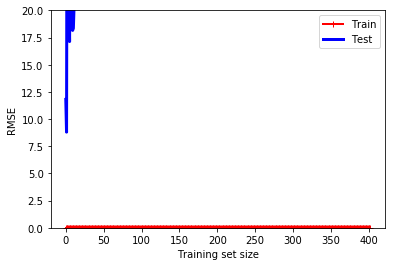

In [21]:
plot_learning_curves(LinearRegression(), X_poly, y)

## **Observations:**
1. At the steady state, the training RMSE is extremely low but the test RMSE is extremely high (sign of very large degree of overfitting). 
1. This makes sense as there is great complexity in the model (with degree 5 we have created 8567 features) and the training dataset is essentially being memorized. 

### 3-	Learning curve for ridge regression for polynomial features created (from the original features)

We should first standardize the features as this is highly recommended for Ridge regression. 

In [22]:
from sklearn.preprocessing import StandardScaler
# standardization

scaler=StandardScaler()
X_poly_stan=scaler.fit_transform(X_poly)

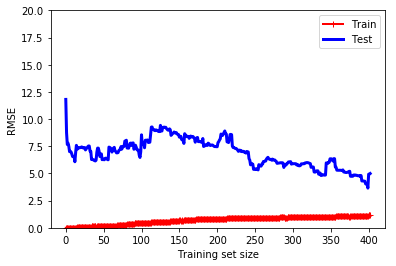

In [23]:
from sklearn.linear_model import Ridge

plot_learning_curves(Ridge(), X_poly_stan, y)

## **Observations:**
1. At the steady state, the train RMSE is very low and the test RMSE is higher  - there is definitely overfitting going on here (however it is not as bad as the polynomial regression). Perhaps the default value of alpha is not optimal (we will find optimal alpha later on). 

### 4-	Learning curve for lasso regression for polynomial features created (from the original features)

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

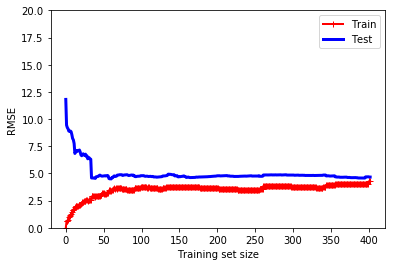

In [24]:
from sklearn.linear_model import Lasso

plot_learning_curves(Lasso(), X_poly_stan, y)

Similar to linear regression, at the steady state, low training RMSE and pretty low testing RMSE - but the test RMSE is somewhat higher than the train RMSE so there is a little bit of overfitting occurring but decently fit. 

### 5-	Learning curve for elastic Net for polynomial features created (from the original features)

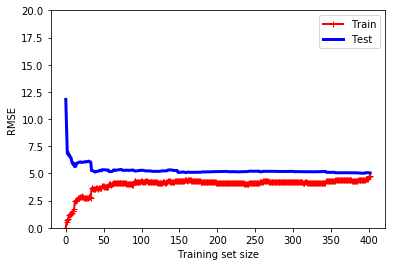

In [47]:
from sklearn.linear_model import ElasticNet

plot_learning_curves(ElasticNet(), X_poly_stan, y)

Similar to linear regression and Lasso, at the steady state, low training RMSE and pretty low testing RMSE - but the test RMSE is somewhat higher than the train RMSE so there is a little bit of overfitting occurring but decently fit. 

### Find optimal alpha and R^2 with RidgeCV

The optimal alpha and R^2 from RidgeCV using the standardized polynomial features are 10 and 96.70% respectively. 

In [48]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)

ridgecv.fit(X_poly_stan, y)

ridgecv.alpha_

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


10.0

In [49]:
ridgecv.score(X_poly_stan, y)

0.8812800766555319

### Find optimal alpha and R^2 with LassoCV
The optimal alpha and R^2 from LassoCV using the standardized polynomial features are 0.0546 and 91.17% respectively. Although the R^2 is lower than RidgeCV, we know that LassoCV has built in variable selection and likely produces a simpler model that may be worth the reduced R^2 (important in implementation). 

In [19]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)

lassocv.fit(X_poly_stan, y)

lassocv.alpha_

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

0.05460569117846562

In [20]:
lassocv.score(X_poly_stan, y)

0.9117183921525787

### Find optimal alpha and R^2 with ElasticNetCV
The optimal alpha and R^2 from ElasticNetCV using the standardized polynomial features are 0.0886 and 91.15% respectively, similar to LassoCV.

In [21]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV(cv=5)

elasticcv.fit(X_poly_stan, y)

elasticcv.alpha_

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

0.08858471930286775

In [22]:
elasticcv.score(X_poly_stan, y)

0.9114633748335201

In [23]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV(cv=5)

elasticcv.fit(X_poly_stan, y)

elasticcv.alpha_

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

0.08858471930286775

In [24]:
from sklearn.linear_model import ElasticNetCV
clf2 = ElasticNetCV(alphas=[1e-3, 1e-2, 1e-1, 1], random_state=2).fit(X_poly_stan, y)
print('Best score is: ', clf2.score(X_poly_stan, y))

print('Best alpha is: ', clf2.alpha_)
      

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Best score is:  0.9078443829866076
Best alpha is:  0.1


C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
clf3 = ElasticNetCV(alphas=[.01], random_state=2).fit(X_poly_stan, y)
clf3.score(X_poly_stan, y)

C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Esmal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

0.958853523767482

In [26]:
clf3.alphas_

array([0.01])

In [27]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(X, y)

print(regr.alpha_) 
print(regr.score(X, y)) 

0.1994727942696716
0.9919989267248279


In [28]:
regr = ElasticNetCV(alphas=[.0005], cv=5, random_state=0)
regr.fit(X, y)

print(regr.alpha_) 
print(regr.score(X, y)) 

0.0005
0.9999999395304334


In [29]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
X, y = load_diabetes(return_X_y=True)
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
clf.score(X, y)
print('alpha: ',clf.alpha_)
print('score: ',clf.score(X, y))

alpha:  0.01
score:  0.5166287840315842


In [30]:
clf = RidgeCV(alphas=[.1]).fit(X, y)
clf.score(X, y)
print('alpha: ',clf.alpha_)
print('score: ',clf.score(X, y))

alpha:  0.1
score:  0.5125629767961007
